### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [0]:
import tensorflow as tf

#### Collect Fashion mnist data from tf.keras.datasets 

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [59]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### Change train and test labels into one-hot vectors

In [60]:
#check the unique values of y_train and y_test before converting to 1 hot vectors 
import numpy as np
np.unique(y_train, axis=0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [61]:
np.unique(y_test, axis=0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
# converting to 1 hot vectors 
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

#### Build the Graph

label for each of the below image: 9
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 2
label for each of the below image: 7
label for each of the below image: 2
label for each of the below image: 5
label for each of the below image: 5


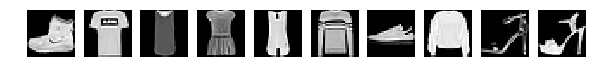

In [63]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()

#### Initialize model, reshape & normalize data

In [0]:
#importing the required packages 
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras import optimizers

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
#Add 1st FC layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
#Add 2nd FC layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

In [0]:
#adding dropout layer
model.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
# Fit the model
model.fit(x_train,y_train,          
          validation_data=(x_test,y_test),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.5105 - acc: 0.8164 - val_loss: 0.4245 - val_acc: 0.8478
Epoch 2/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.3953 - acc: 0.8562 - val_loss: 0.3728 - val_acc: 0.8615
Epoch 3/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.3589 - acc: 0.8677 - val_loss: 0.3643 - val_acc: 0.8703
Epoch 4/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.3320 - acc: 0.8774 - val_loss: 0.3625 - val_acc: 0.8732
Epoch 5/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.3158 - acc: 0.8820 - val_loss: 0.3492 - val_acc: 0.8758
Epoch 6/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.2961 - acc: 0.8903 - val_loss: 0.3611 - val_acc: 0.8801
Epoch 7/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.2871 - acc: 0.8923 - val_l

In [74]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_9 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
____________________________________________

In [87]:
#score on train data
score = model.evaluate(x_train, y_train, verbose=0)
score
print("The accuracy of train data is: ",score[1])

The accuracy of train data is:  0.92165


In [88]:
#score on test data
score = model.evaluate(x_test, y_test, verbose=0)
score
print("The accuracy of test data is: ",score[1])

The accuracy of test data is:  0.8851


In [89]:
model.predict(x_test)

array([[2.73297246e-10, 2.03602260e-10, 1.04579026e-10, ...,
        8.87101423e-03, 4.64853755e-09, 9.90796685e-01],
       [1.17379352e-06, 4.73605403e-17, 9.97035503e-01, ...,
        1.36648427e-27, 9.70620746e-14, 1.55564006e-28],
       [6.29122431e-18, 1.00000000e+00, 2.10848403e-20, ...,
        2.97656834e-22, 3.09943604e-26, 3.28014704e-32],
       ...,
       [1.28742813e-05, 2.56115468e-13, 7.23587732e-07, ...,
        9.26545489e-14, 9.99981642e-01, 7.68748383e-15],
       [6.39154968e-15, 1.00000000e+00, 4.93527254e-17, ...,
        3.74181602e-18, 5.67179755e-19, 1.99812851e-23],
       [8.50419212e-07, 7.48120121e-10, 1.67055128e-04, ...,
        8.25486556e-02, 1.38590467e-05, 5.42115886e-04]], dtype=float32)